# Hat Game Simulation
We simulate the game where the numbers in the list go from 1 to 2024.

In [1]:
import random

def hat_game_simulation(n):
    # Create a list of numbers from 1 to n
    numbers = list(range(1, n+1))
    
    # Repeat the process until one number remains
    while len(numbers) > 1:
        # Randomly choose two numbers and remove them from the hat
        a, b = random.sample(numbers, 2)
        numbers.remove(a)
        numbers.remove(b)
        
        # Calculate the difference, add it to the hat, and discard the original numbers
        difference = abs(a - b)
        if difference != 0:
            numbers.append(difference)

    # Return the last remaining number
    return numbers[0]

# Run the simulation for the hat problem with 2024 numbers
print("Simulation 1: ", str(hat_game_simulation(2024)))
print("Simulation 2: ", str(hat_game_simulation(2024)))
print("Simulation 3: ", str(hat_game_simulation(2024)))

Simulation 1:  44
Simulation 2:  606
Simulation 3:  536


## Statistical Simulation & Sampling
We extend this problem and generate a 1000 simulations and plot the outcomes

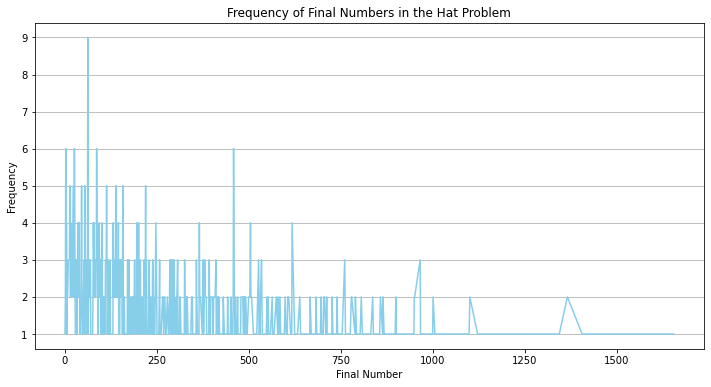

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to simulate the hat problem
def simulate_hat_problem(num_papers=2024, num_simulations=1000):
    final_numbers = np.zeros(num_simulations, dtype=int)

    for sim in range(num_simulations):
        numbers = np.arange(1, num_papers + 1)

        while len(numbers) > 1:
            # Draw two random numbers
            drawn = np.random.choice(numbers, size=2, replace=False)
            # Calculate the difference and remove the drawn numbers
            numbers = np.setdiff1d(numbers, drawn)
            # Add the new number (difference) to the hat
            numbers = np.append(numbers, np.abs(drawn[0] - drawn[1]))

        # Record the final number
        final_numbers[sim] = numbers[0]

    return final_numbers

# Simulate the hat problem
final_numbers = simulate_hat_problem()

# Analyze the results
unique, counts = np.unique(final_numbers, return_counts=True)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(unique, counts, color='skyblue')
plt.title('Frequency of Final Numbers in the Hat Problem')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
#plt.xticks(unique)
plt.grid(axis='y')
plt.show()